In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the file of contestant data
file_path = '/Users/ginagrainda/Desktop/survivor_data/survivor_contestants_encoded.csv'
data = pd.read_csv(file_path)

In [25]:
features = data.drop(columns=['contestant_name', 'age', 'hometown', 'profession','country', 'birthdate', 
                              'num_boot', 'initial-tribe','industry', 'gender', 'state', 'region', 
                              'astrological_sign', 'tribe_color', 'age_band', 'num_season', 'finish'], inplace=False)

In [26]:
# Correlations shows how two variables move in relation to one another. 
    # It ranges between -1 and 1, with a value of 0 indicating no correlation
correlation_matrix = features.corr()

# Look for the correlations with the winner 
winner_correlations = correlation_matrix['winner']
sorted_winner_correlations = winner_correlations.sort_values(ascending=False)
top_25_correlations = sorted_winner_correlations.head(25)
print(top_25_correlations)

winner                                        1.000000
region_Caribbean                              0.143429
industry_Business, Finance, Administrative    0.102884
region_Canada                                 0.093032
astrological_sign_Capricorn                   0.088584
industry_Retail and Consumer Services         0.076846
gender_M                                      0.041600
region_Northeast                              0.040264
industry_Law, Public Safety, Military         0.030647
astrological_sign_Cancer                      0.027639
age_band_26-35                                0.027471
industry_Nonprofit, Social, Religious         0.026010
astrological_sign_Leo                         0.025623
num_appearance                                0.024788
latinx                                        0.024399
jewish                                        0.023078
age_band_18-25                                0.021451
tribe_color_Pink                              0.018269
white     

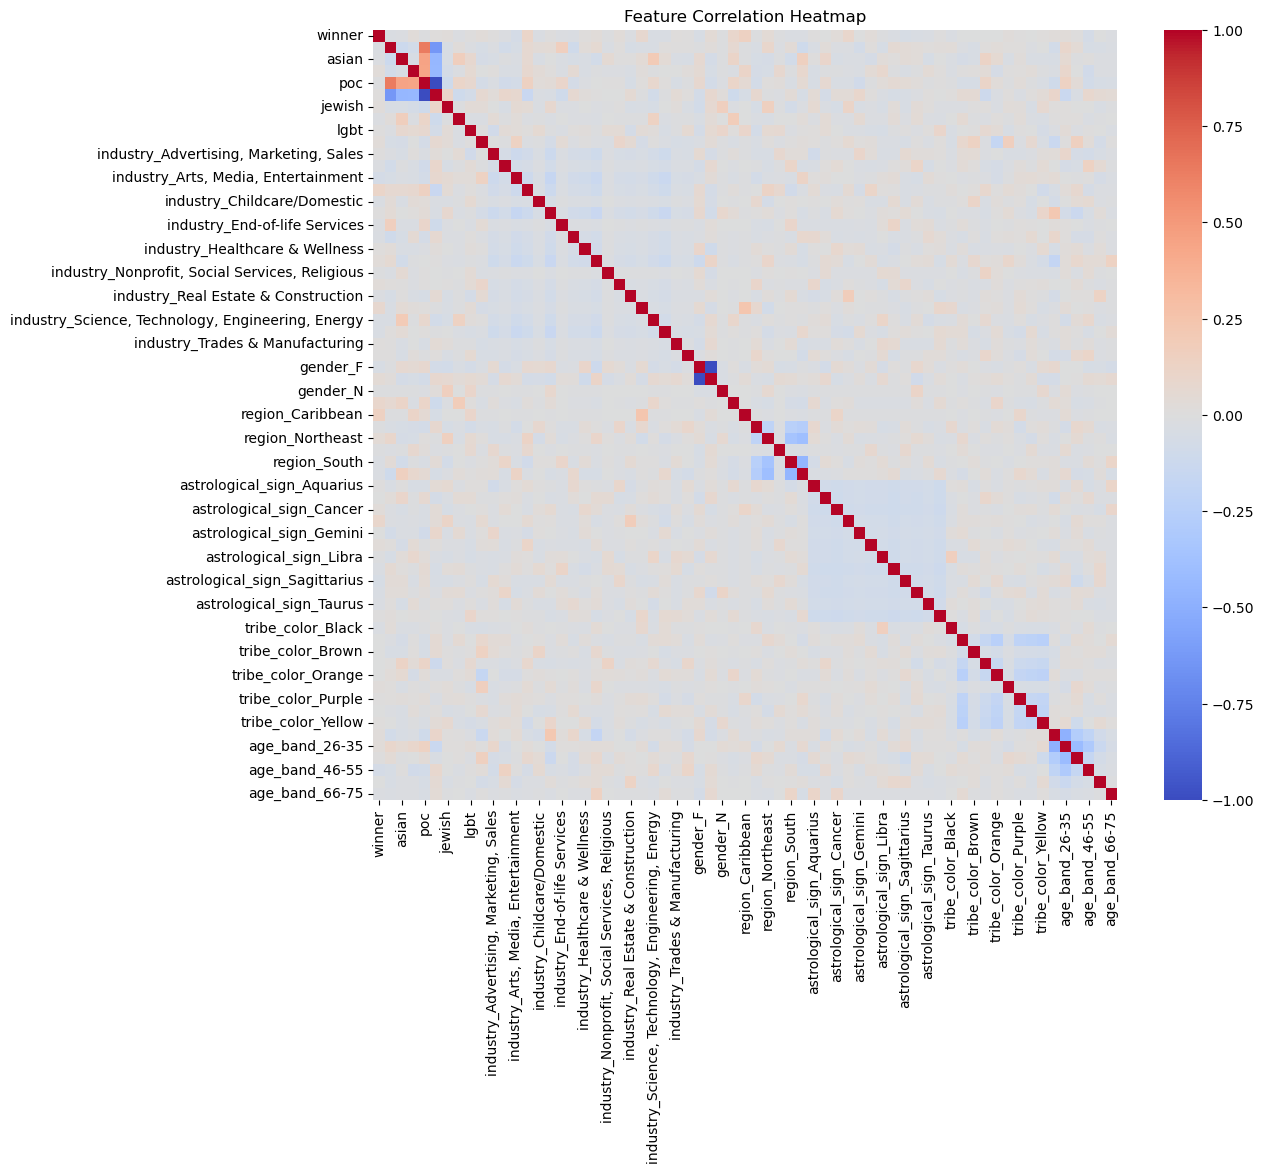

In [27]:
# Make a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Correlations measure linear relationships
    # Looking at the correlation values & heatmap, there are low correlations between winner and the features
    # The features (hopefully) have non-linear relationships, and the predictive power can't be measured with correlations
    # During modeling, it will be important to use an non-linear model (ex. xgboost or random forest)

In [43]:
# Feature engineering!
# Create interaction features to enhance predictive 
data['gender_man_and_region_West'] = data['gender_M'] * data['region_West'] # men from West have a higher chance of winning
data['industry_Finance_and_region_Northeast'] = data['industry_Business, Finance, Administrative'] * data['region_Northeast'] # contestants who work in Business, Finance, or Administrative jobs and are from the Northeast perform better
data['poc_and_age_26_35'] = data['poc'] * data['age_band_26-35'] # contestants who are people of color (POC) and are ages 26-35 when they play have a higher chance of winning
data['tribe_blue_and_capricorn'] = data['tribe_color_Blue'] * data['astrological_sign_Capricorn'] # fun feature! Contestants whose astrological sign is Capricorn and have an initial tribe color of blue have a higher chance of winning

# Verify the new columns
print(data[['gender_man_and_region_West', 'industry_Finance_and_region_Northeast', 
            'poc_and_age_26_35', 'tribe_blue_and_capricorn']].head())

   gender_man_and_region_West  industry_Finance_and_region_Northeast  \
0                           0                                      0   
1                           0                                      0   
2                           0                                      0   
3                           0                                      0   
4                           0                                      0   

   poc_and_age_26_35  tribe_blue_and_capricorn  
0                  0                         0  
1                  0                         0  
2                  0                         0  
3                  1                         0  
4                  0                         0  


In [46]:
# Define features (X) and target (y)
X = data[['gender_M',
          'gender_F',
          'industry_Education',
          'industry_Law, Public Safety, Military',
          'industry_Business, Finance, Administrative',
          'region_Northeast',
          'region_West',
          'age_band_26-35',
          'tribe_color_Blue',
          'tribe_color_Yellow',
        # Interaction features
          'gender_man_and_region_West', 
          'industry_Finance_and_region_Northeast', 
          'poc_and_age_26_35', 
          'tribe_blue_and_capricorn']]  # Selected additional features
y = data['winner']  # Target column 

In [49]:
# Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}")
print(f"Testing size: {X_test.shape}")

Training size: (671, 14)
Testing size: (168, 14)


In [51]:
import xgboost as xgb
print(f"XGBoost version: {xgb.__version__}")

ModuleNotFoundError: No module named 'xgboost'

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Train the xgboost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

ModuleNotFoundError: No module named 'xgboost'